<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [1]:
!pip install pm4py

In [2]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/exportgbiall01_05_all4.csv',sep=";",names = ['Timestamp','org:resource','case:concept:name', 'transaction', 'concept:name','dialog_steps', 'total response time (s)', 'av_resp_time_per_dialog_steps_in_ms', 'total CPU time(s)', 'average CPU time(ms)', 'total database time(s)'],usecols = [1,2,3,4,5,6,7,8,9,10,11])
df.info()
logcost = pm4py.format_dataframe(df, case_id = 'case:concept:name', activity_key= 'concept:name', timestamp_key= 'Timestamp')
logcost['time:timestamp'] = pd.to_datetime(df.Timestamp)
print(type(df['dialog_steps'][0]))
df['dialog_steps'] = df['dialog_steps'].str.replace(',', '.')
df['dialog_steps'] = pd.to_numeric(df['dialog_steps'])
df['av_resp_time_per_dialog_steps_in_ms'] = df['av_resp_time_per_dialog_steps_in_ms'].str.replace(',', '.')
#df['average CPU time(ms)'] = pd.to_numeric(df['average CPU time(ms)'])
df['av_resp_time_per_dialog_steps_in_ms'] = pd.to_numeric(df['av_resp_time_per_dialog_steps_in_ms'])
print(df)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Timestamp                            183 non-null    object
 1   org:resource                         183 non-null    object
 2   case:concept:name                    183 non-null    int64 
 3   transaction                          183 non-null    object
 4   concept:name                         183 non-null    object
 5   dialog_steps                         183 non-null    object
 6   total response time (s)              183 non-null    object
 7   av_resp_time_per_dialog_steps_in_ms  183 non-null    object
 8   total CPU time(s)                    183 non-null    object
 9   average CPU time(ms)                 183 non-null    object
 10  total database time(s)               183 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.9+ K

In [24]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'medium'
         }
pylab.rcParams.update(params)

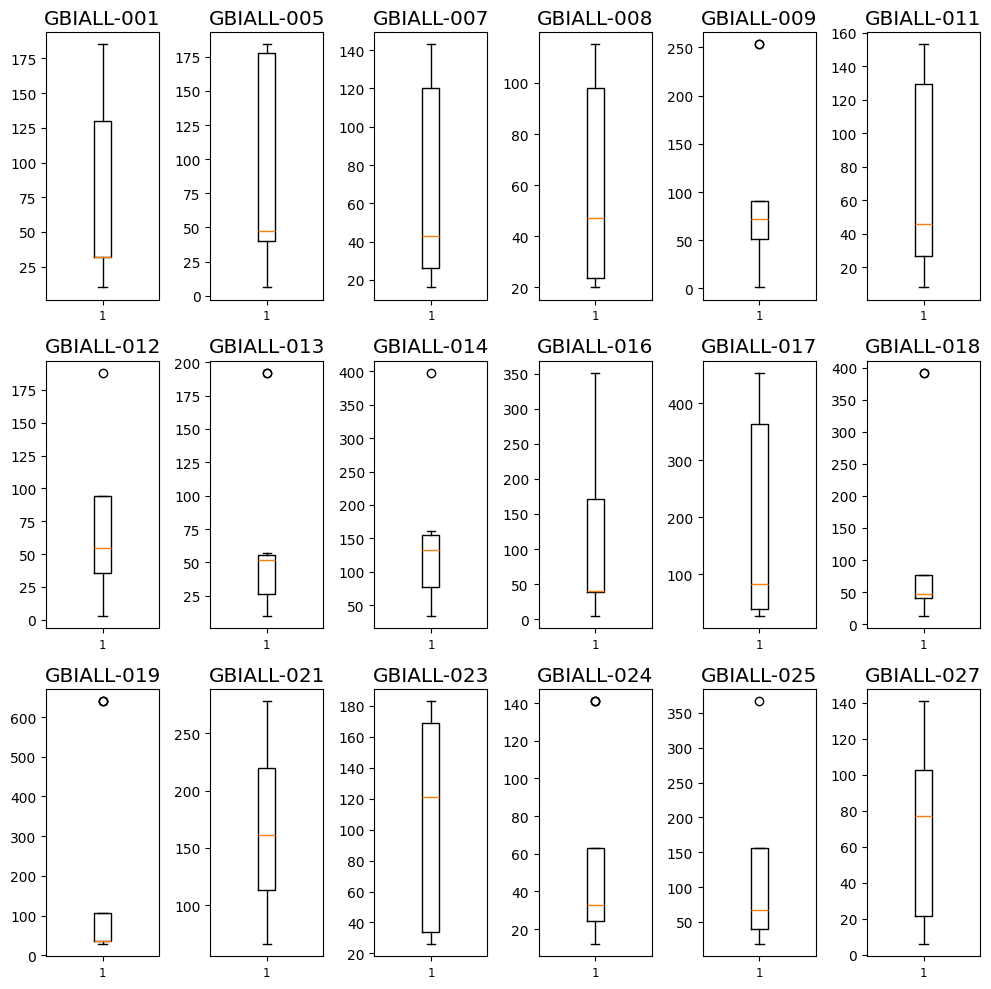

In [22]:
df0 = [x for _, x in df.groupby(df['org:resource'])]
#print(df0[1])
figure, axis = plt.subplots(3, 6)
for x in range(0, len(df0)):
  if x < 6:
    axis[0, x].set_title(df0[x]['org:resource'].values[1])
    axis[0, x].boxplot(df0[x]['dialog_steps'])
  else:
    if x < 12:
      axis[1, x - 6].set_title(df0[x]['org:resource'].values[1])
      axis[1, x - 6].boxplot(df0[x]['dialog_steps'])
    else:
      axis[2, x - 12].set_title(df0[x]['org:resource'].values[1])
      axis[2, x - 12].boxplot(df0[x]['dialog_steps'])
figure.tight_layout()
plt.savefig('fig1.png')
plt.show()




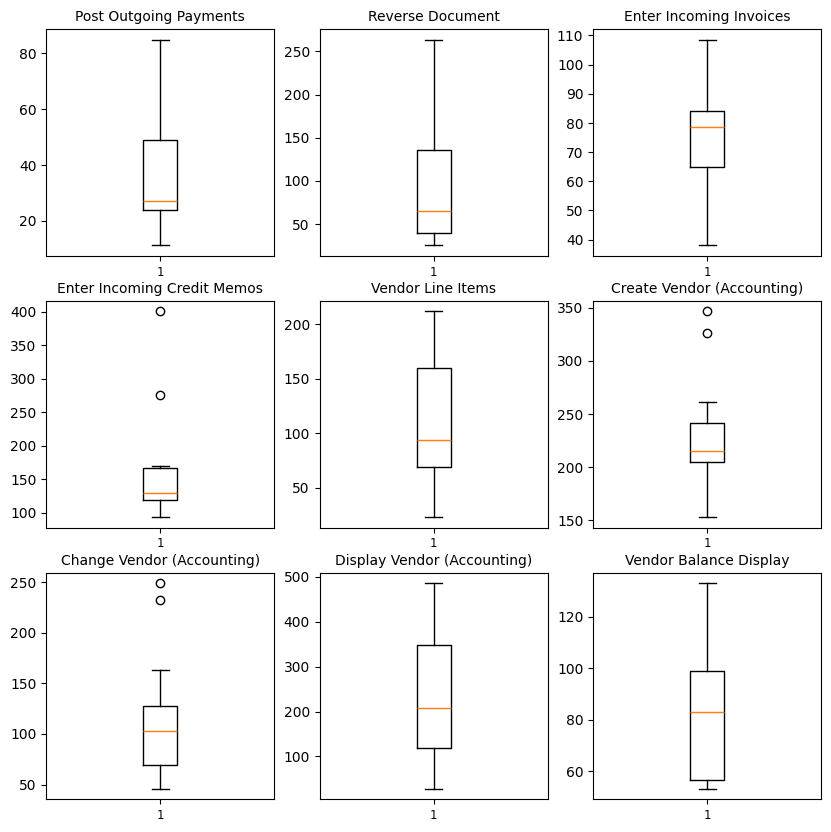

In [26]:
df0 = [x for _, x in df.groupby(df['transaction'])]
#print(df0[1])
figure, axis = plt.subplots(3, 3)
for x in range(0, len(df0)):
  if x < 3:
    axis[0, x].set_title(df0[x]['concept:name'].values[1])
    axis[0, x].boxplot(df0[x]['av_resp_time_per_dialog_steps_in_ms'])
  else:
    if x < 6:
      axis[1, x - 3].set_title(df0[x]['concept:name'].values[1])
      axis[1, x - 3].boxplot(df0[x]['av_resp_time_per_dialog_steps_in_ms'])
    else:
      axis[2, x - 6].set_title(df0[x]['concept:name'].values[1])
      axis[2, x - 6].boxplot(df0[x]['av_resp_time_per_dialog_steps_in_ms'])
plt.savefig('fig2.png')
plt.show()

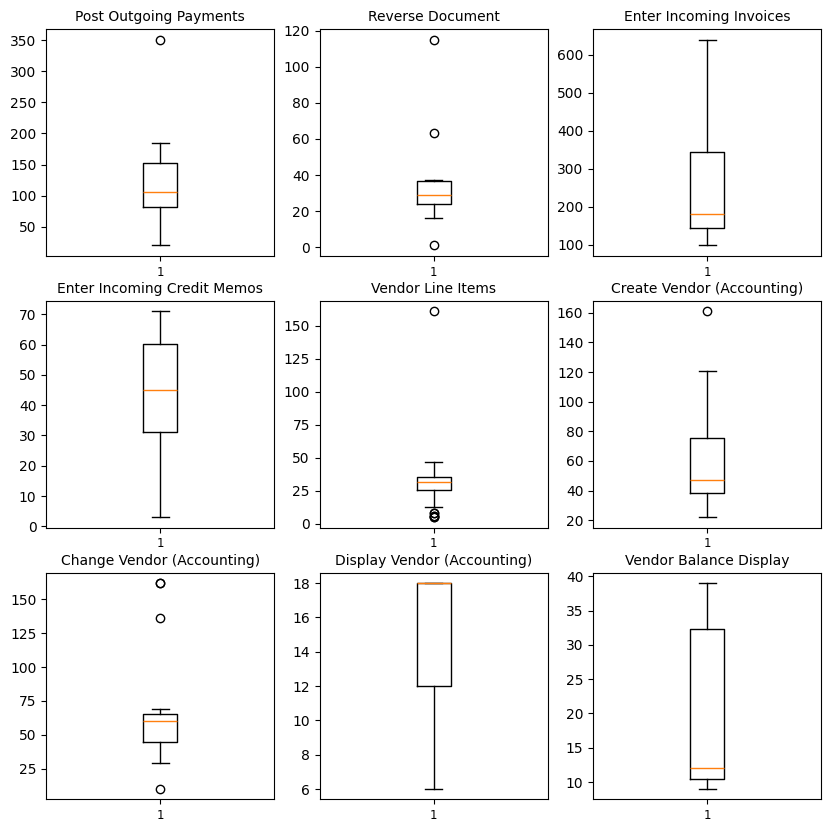

In [28]:
df0 = [x for _, x in df.groupby(df['transaction'])]
#print(df0[1])
figure, axis = plt.subplots(3, 3)
for x in range(0, len(df0)):
  if x < 3:
    axis[0, x].set_title(df0[x]['concept:name'].values[1])
    axis[0, x].boxplot(df0[x]['dialog_steps'])
  else:
    if x < 6:
      axis[1, x - 3].set_title(df0[x]['concept:name'].values[1])
      axis[1, x - 3].boxplot(df0[x]['dialog_steps'])
    else:
      axis[2, x - 6].set_title(df0[x]['concept:name'].values[1])
      axis[2, x - 6].boxplot(df0[x]['dialog_steps'])
plt.savefig('fig3.png')
plt.show()

filtered_dataframe = pm4py.filter_trace_attribute_values(
    log,
    'User',
    ['GBIALL-001'],
    case_id_key='case:concept:name'
)
filtered_dataframe

In [29]:

for variant, subdf in pm4py.split_by_process_variant(logcost):
    print(variant)  # The definition of that particular variant
    #print(subdf)   ## the sub-dataframe (only that particular variant)
    subdf.to_csv('out.csv')
    print(f"There are {len(subdf)} of the the variant \t {variant}")


('Create Vendor (Accounting)', 'Change Vendor (Accounting)', 'Enter Incoming Invoices', 'Vendor Balance Display', 'Vendor Line Items', 'Post Outgoing Payments', 'Vendor Line Items', 'Enter Incoming Invoices', 'Vendor Line Items', 'Reverse Document', 'Vendor Line Items', 'Enter Incoming Invoices', 'Vendor Line Items', 'Enter Incoming Credit Memos', 'Vendor Line Items', 'Post Outgoing Payments', 'Vendor Line Items')
There are 17 of the the variant 	 ('Create Vendor (Accounting)', 'Change Vendor (Accounting)', 'Enter Incoming Invoices', 'Vendor Balance Display', 'Vendor Line Items', 'Post Outgoing Payments', 'Vendor Line Items', 'Enter Incoming Invoices', 'Vendor Line Items', 'Reverse Document', 'Vendor Line Items', 'Enter Incoming Invoices', 'Vendor Line Items', 'Enter Incoming Credit Memos', 'Vendor Line Items', 'Post Outgoing Payments', 'Vendor Line Items')
('Create Vendor (Accounting)', 'Change Vendor (Accounting)', 'Enter Incoming Invoices', 'Vendor Line Items', 'Post Outgoing Paymen

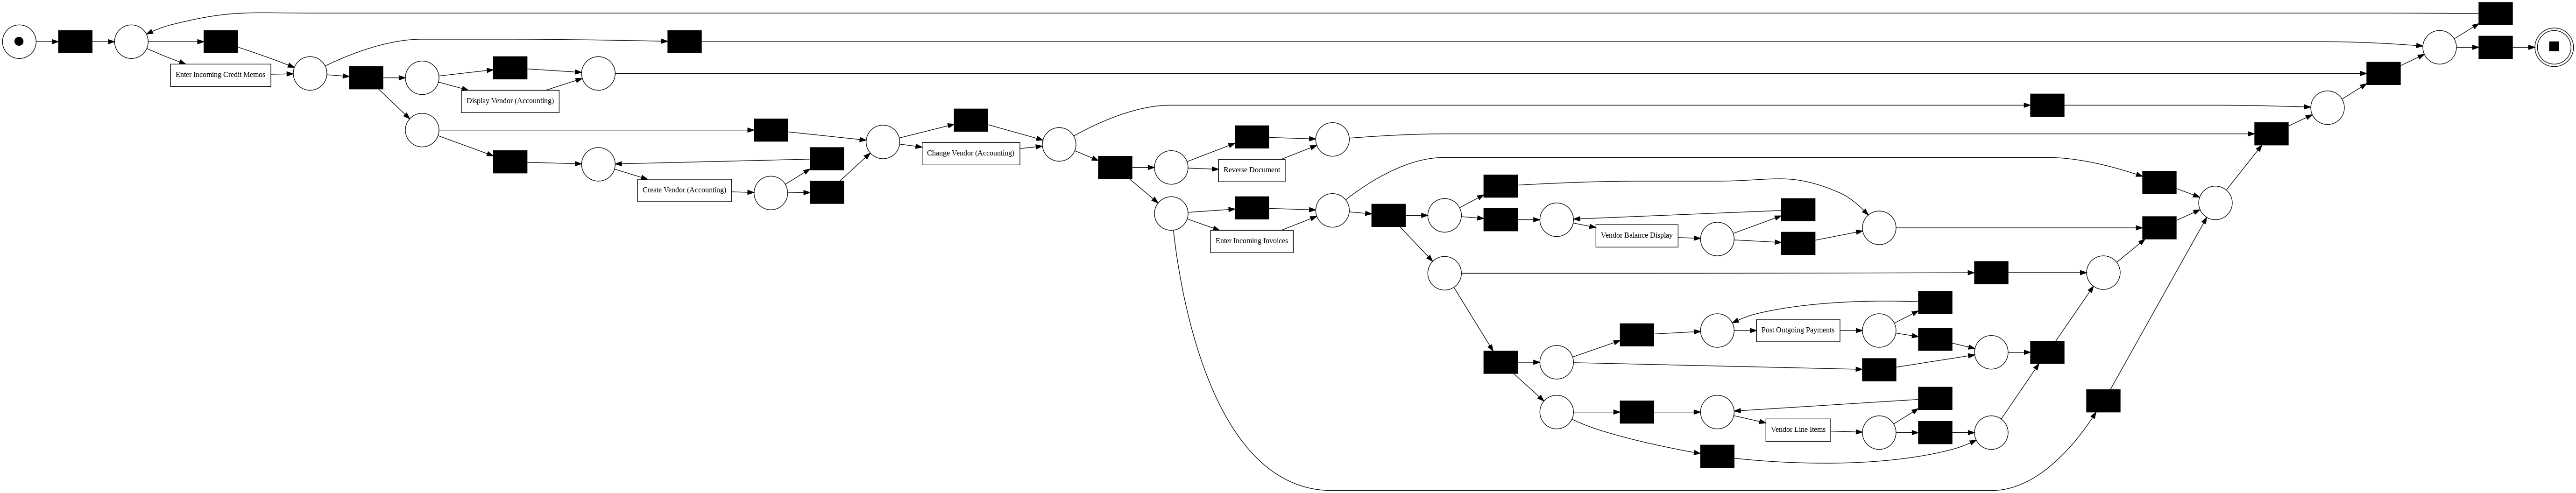

In [8]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(logcost, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

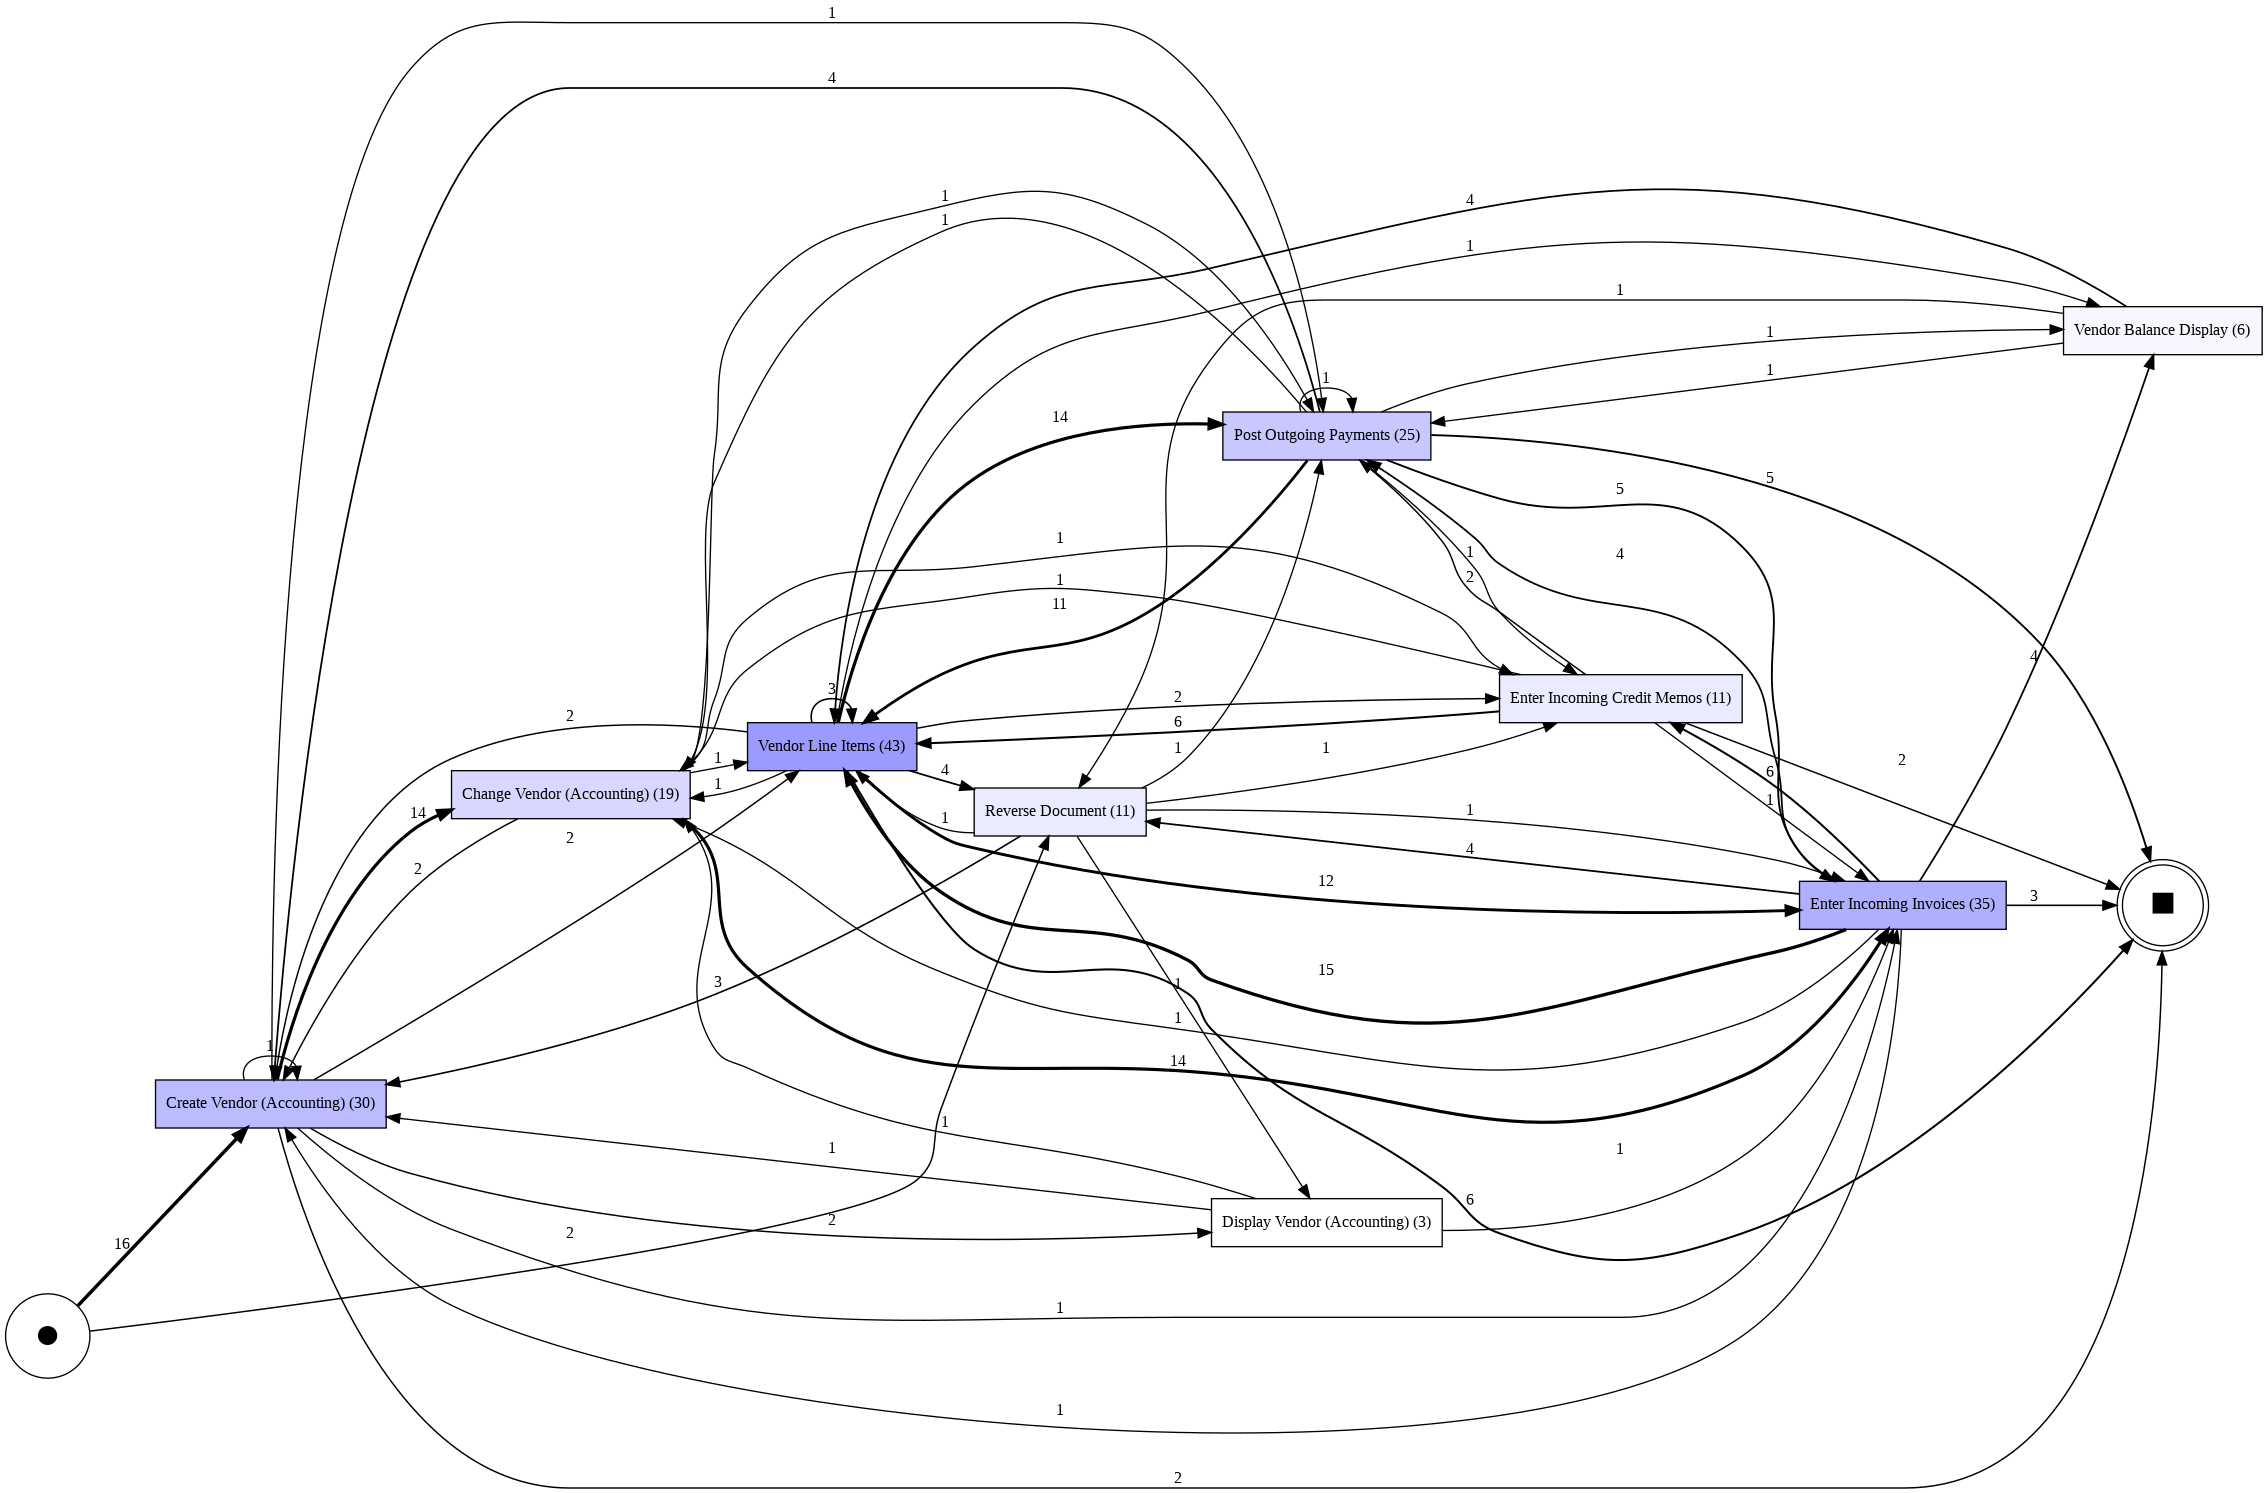

In [31]:
dfg, start_activities, end_activities = pm4py.discover_dfg(logcost, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
transition_system = pm4py.discover_transition_system(logcost, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_transition_system(transition_system)



In [30]:
print(pm4py.stats.get_case_duration(logcost, case_id = '8'))

-2040.0


In [ ]:
from matplotlib import pyplot as plt
case_duration = pm4py.get_all_case_durations(logcost)
print(case_duration)
attr = pm4py.get_event_attribute_values(logcost, 'org:resource')
attr2 = pm4py.get_event_attribute_values(logcost, 'dialog_steps')
attr3 = pm4py.get_event_attribute_values(logcost, 'transaction')

print(attr)
print(attr2)
x= attr.keys()
y = attr.values()
x2 = attr2.keys()
y2 = attr2.values()
x3 = attr3.keys()
y3 = attr3.values()
plt.figure(figsize=(30, 5))
plt.bar(x, y, color = 'red')
plt.show()
plt.bar(x2, y2, color = 'green')
plt.show()
plt.bar(x3, y3, color = 'purple')
plt.show()

In [ ]:
pm4py.get_start_activities(logcost)

In [ ]:
pm4py.get_end_activities(logcost)

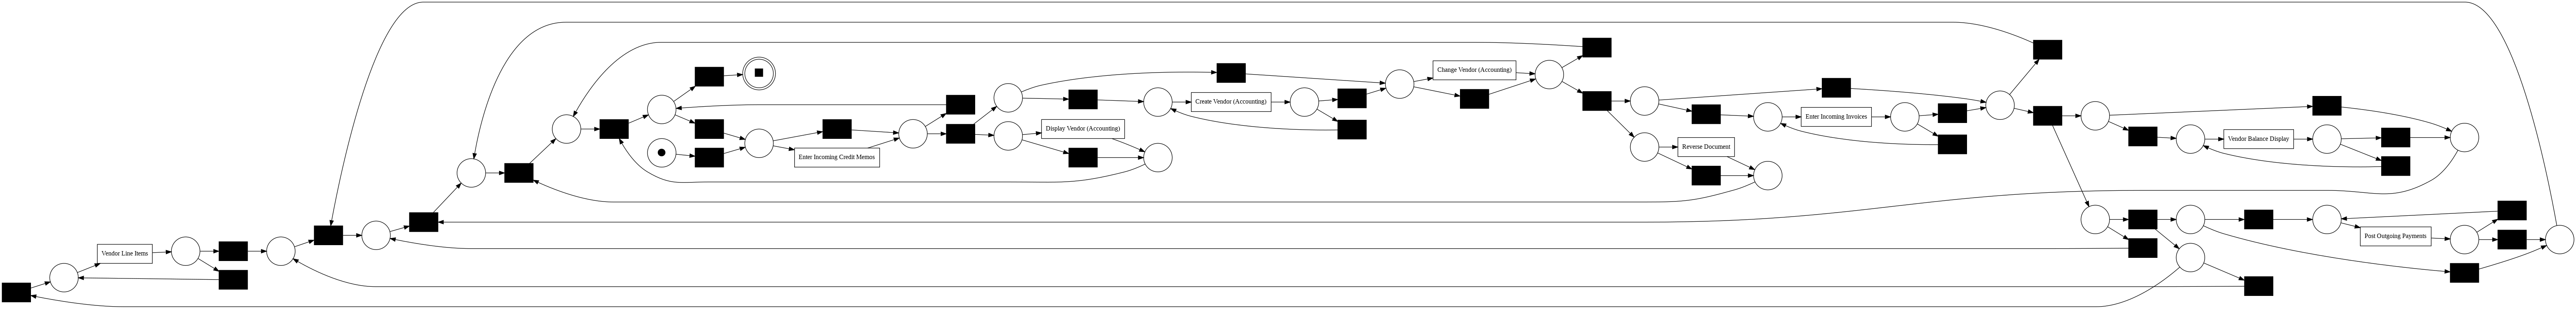

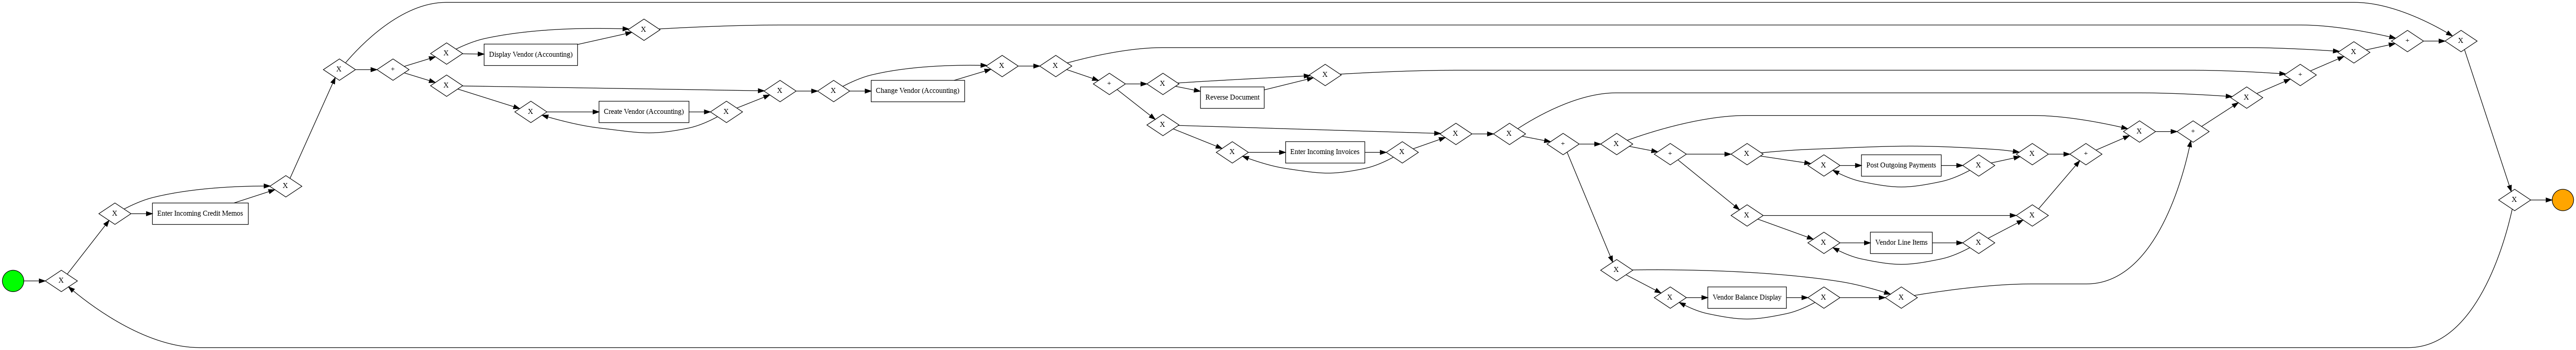

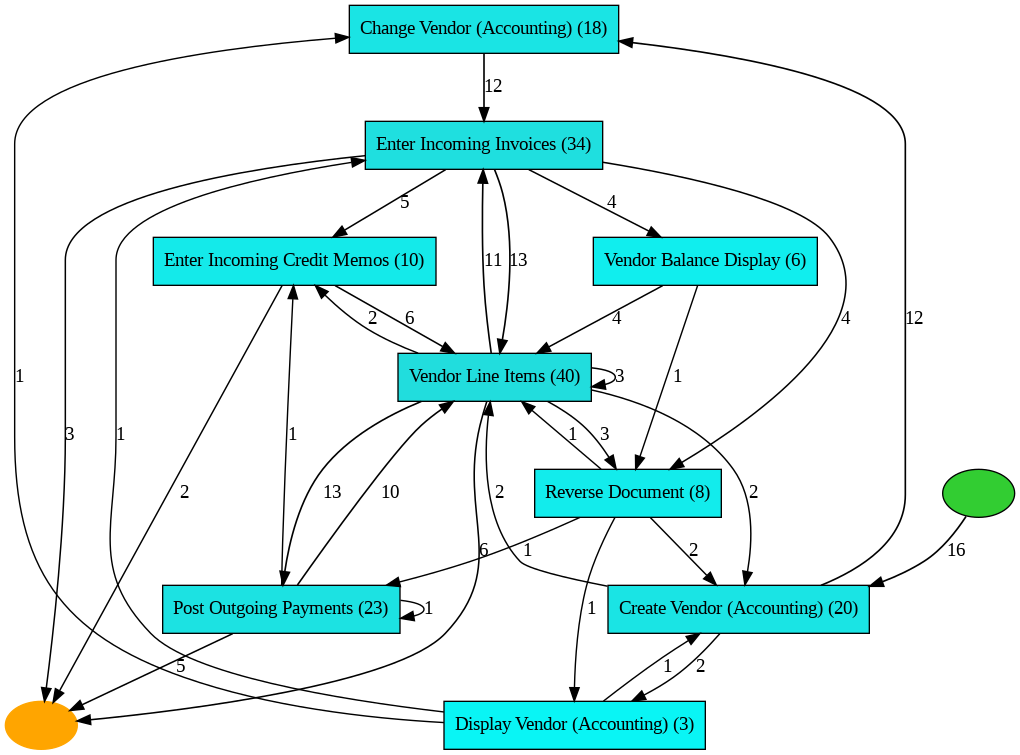

In [ ]:
filt_log2 = pm4py.filter_start_activities(logcost, {'Create Vendor (Accounting)'})
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filt_log2, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

bpmn_model = pm4py.discover_bpmn_inductive(filt_log2)
pm4py.view_bpmn(bpmn_model)

map = pm4py.discover_heuristics_net(filt_log2)
pm4py.view_heuristics_net(map)
map

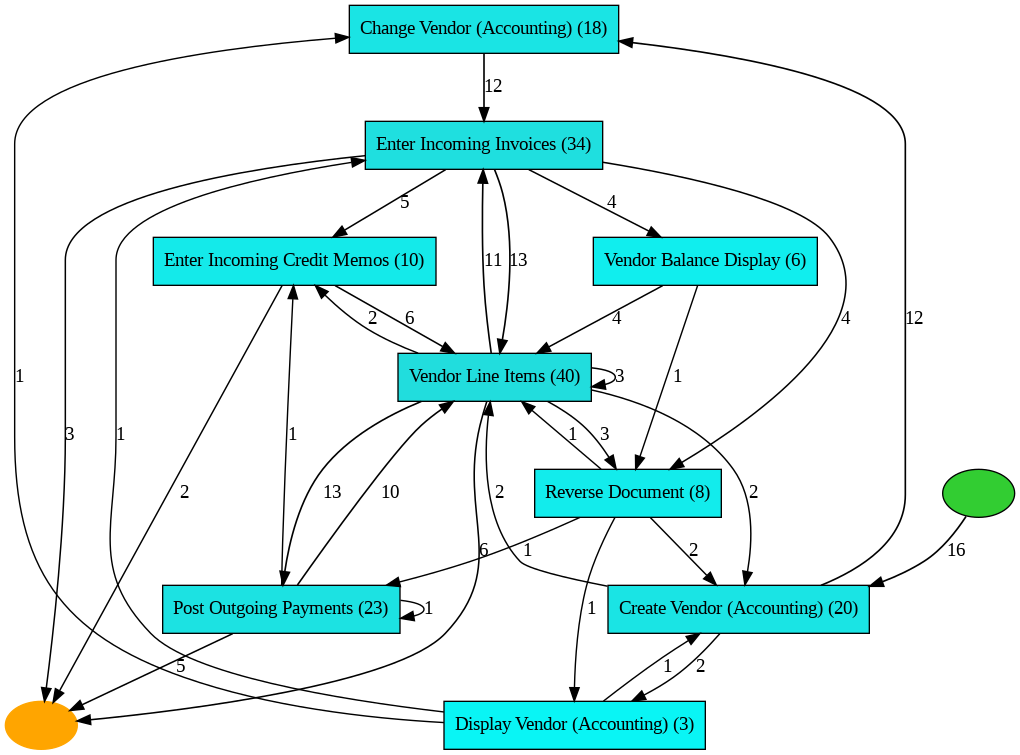

{'Change Vendor (Accounting)': (node:Change Vendor (Accounting) connections:{Enter Incoming Invoices:[0.7857142857142857]}), 'Enter Incoming Invoices': (node:Enter Incoming Invoices connections:{Enter Incoming Credit Memos:[0.5714285714285714], Reverse Document:[0.5], Vendor Balance Display:[0.8], Vendor Line Items:[0]}), 'Create Vendor (Accounting)': (node:Create Vendor (Accounting) connections:{Change Vendor (Accounting):[0.6666666666666666], Display Vendor (Accounting):[0], Vendor Line Items:[0]}), 'Display Vendor (Accounting)': (node:Display Vendor (Accounting) connections:{Change Vendor (Accounting):[0.5], Enter Incoming Invoices:[0.5], Create Vendor (Accounting):[0]}), 'Enter Incoming Credit Memos': (node:Enter Incoming Credit Memos connections:{Vendor Line Items:[0]}), 'Reverse Document': (node:Reverse Document connections:{Create Vendor (Accounting):[0.6666666666666666], Display Vendor (Accounting):[0.5], Post Outgoing Payments:[0.5], Vendor Line Items:[0]}), 'Vendor Balance Di

In [ ]:
map = pm4py.discover_heuristics_net(filt_log2)
pm4py.view_heuristics_net(map)
map

{('Create Vendor (Accounting)', 'Change Vendor (Accounting)'): 1, ('Enter Incoming Credit Memos', 'Enter Incoming Invoices'): 1, ('Enter Incoming Invoices', 'Post Outgoing Payments'): 1, ('Enter Incoming Invoices', 'Reverse Document'): 1, ('Post Outgoing Payments', 'Enter Incoming Invoices'): 1, ('Post Outgoing Payments', 'Post Outgoing Payments'): 1, ('Reverse Document', 'Create Vendor (Accounting)'): 1}


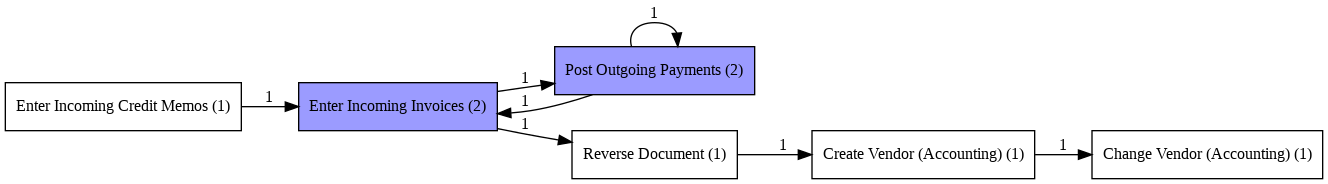

{('Create Vendor (Accounting)', 'Change Vendor (Accounting)'): 1, ('Enter Incoming Credit Memos', 'Enter Incoming Invoices'): 1, ('Enter Incoming Invoices', 'Post Outgoing Payments'): 1, ('Enter Incoming Invoices', 'Reverse Document'): 1, ('Post Outgoing Payments', 'Enter Incoming Invoices'): 1, ('Post Outgoing Payments', 'Post Outgoing Payments'): 1, ('Reverse Document', 'Create Vendor (Accounting)'): 1}


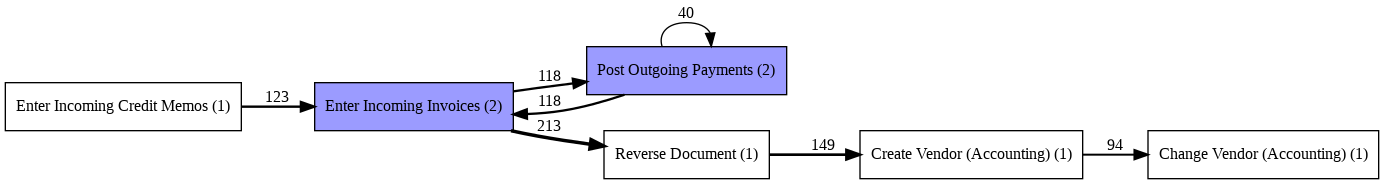

In [ ]:
filtered_log = pm4py.filter_trace_attribute_values(
    logcost,
    'org:resource',
    ['GBIALL-008'],
    case_id_key='case:concept:name'
)

#map = pm4py.discover_heuristics_net(filtered_log)
#pm4py.view_heuristics_net(map)
dfgcost = dfg_discovery.apply(filtered_log)
print(dfgcost)
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
print(dfgcost)
dfgcost2=pd.DataFrame()
dfgcost[('Enter Incoming Credit Memos', 'Enter Incoming Invoices')] = 123
dfgcost[('Create Vendor (Accounting)', 'Change Vendor (Accounting)')] = 94
dfgcost[('Enter Incoming Invoices', 'Post Outgoing Payments')] = 118
dfgcost[('Enter Incoming Invoices', 'Reverse Document')] = 213
dfgcost[('Post Outgoing Payments', 'Enter Incoming Invoices')] = 118
dfgcost[('Post Outgoing Payments', 'Post Outgoing Payments')] = 40
dfgcost[('Reverse Document', 'Create Vendor (Accounting)')] = 149

#dfgcost3 = dfg_discovery.apply(dfgcost2)

from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


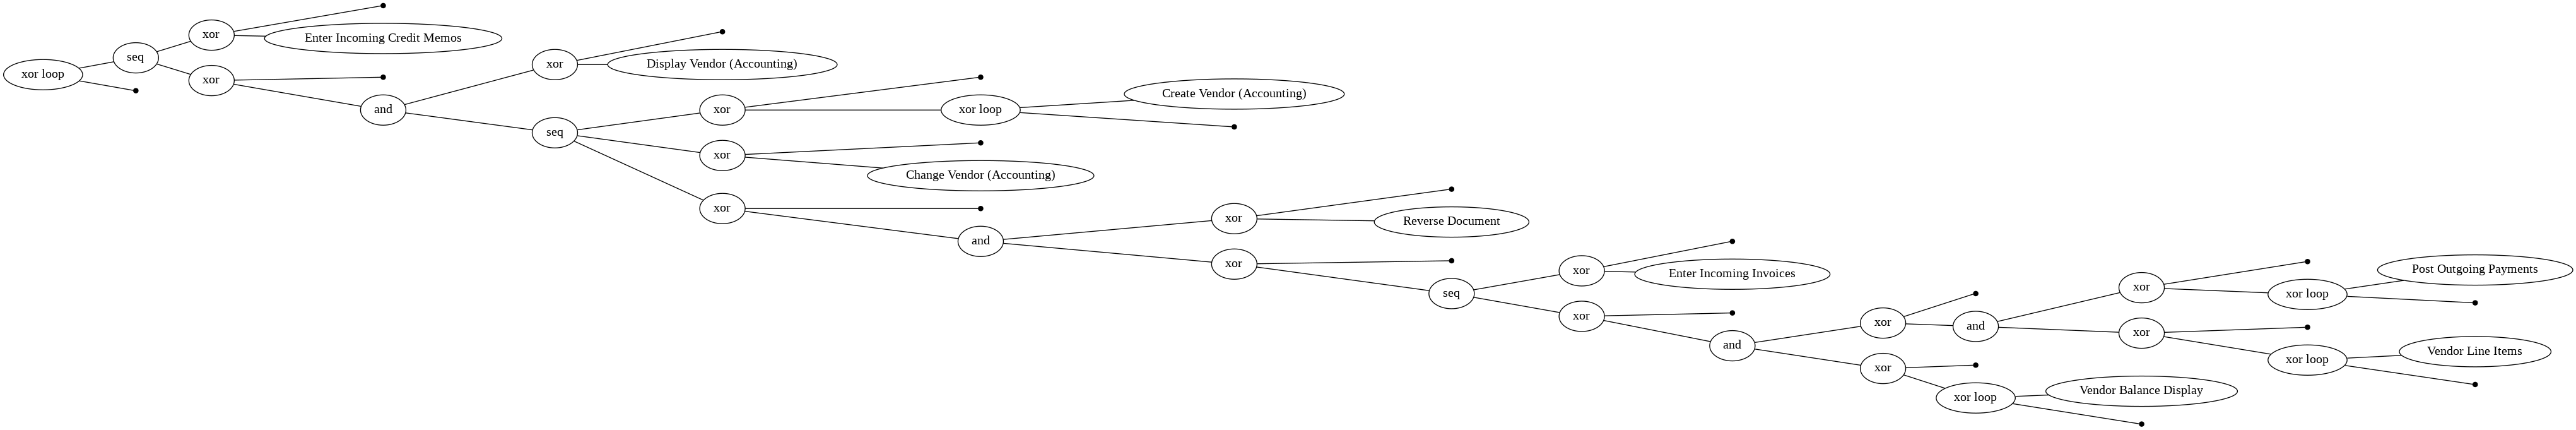

In [ ]:
process_tree = pm4py.discover_process_tree_inductive(logcost)
pm4py.view_process_tree(process_tree)

# Feldolgozás

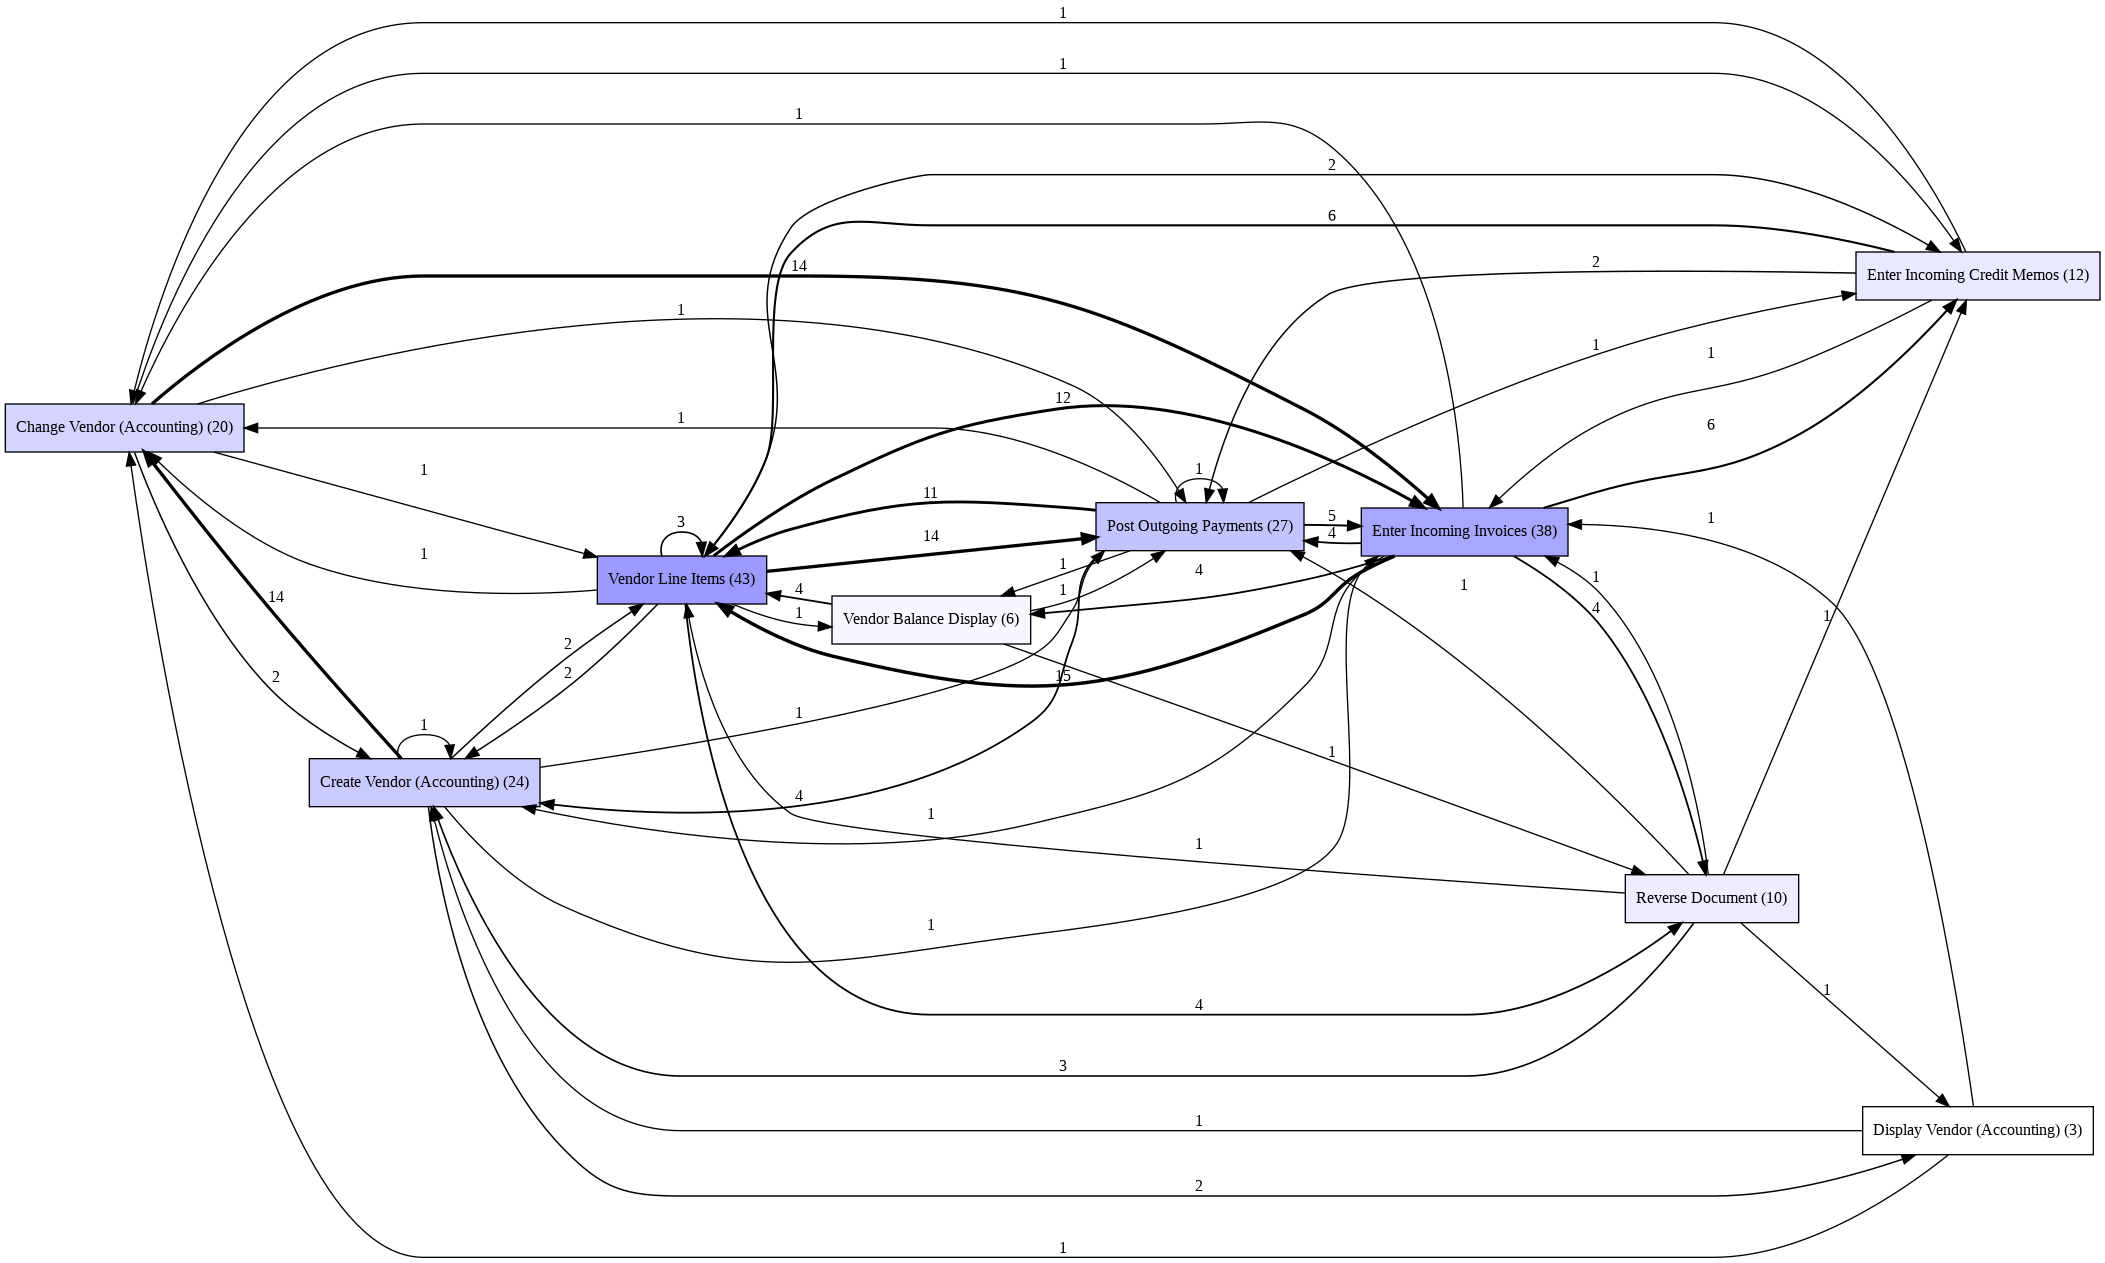

{('Change Vendor (Accounting)', 'Create Vendor (Accounting)'): 2,
 ('Change Vendor (Accounting)', 'Enter Incoming Credit Memos'): 1,
 ('Change Vendor (Accounting)', 'Enter Incoming Invoices'): 14,
 ('Change Vendor (Accounting)', 'Post Outgoing Payments'): 1,
 ('Change Vendor (Accounting)', 'Vendor Line Items'): 1,
 ('Create Vendor (Accounting)', 'Change Vendor (Accounting)'): 14,
 ('Create Vendor (Accounting)', 'Create Vendor (Accounting)'): 1,
 ('Create Vendor (Accounting)', 'Display Vendor (Accounting)'): 2,
 ('Create Vendor (Accounting)', 'Enter Incoming Invoices'): 1,
 ('Create Vendor (Accounting)', 'Post Outgoing Payments'): 1,
 ('Create Vendor (Accounting)', 'Vendor Line Items'): 2,
 ('Display Vendor (Accounting)', 'Change Vendor (Accounting)'): 1,
 ('Display Vendor (Accounting)', 'Create Vendor (Accounting)'): 1,
 ('Display Vendor (Accounting)', 'Enter Incoming Invoices'): 1,
 ('Enter Incoming Credit Memos', 'Change Vendor (Accounting)'): 1,
 ('Enter Incoming Credit Memos', 'Ent

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfgcost = dfg_discovery.apply(logcost)
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=logcost, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
dfgcost


In [ ]:


dfg = pm4py.discover_dfg(logcost)
print(len(dfg))
for df2 in dfg:
  print(df2)
  print('\n')

In [ ]:
for i in range(0, len(logcost)-1):
  print(logcost['concept:name'][i] + "      " + logcost['concept:name'][i+1])

In [ ]:
logcost

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(logcost, variant=dfg_discovery.Variants.FREQUENCY)
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
print(dfg[('Change Document', 'Reverse Document')])
dfg[('Change Document', 'Reverse Document')] =6
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)